# Project: Ford GoBike System Data
## (January 2018 - December 2018)


## Table of Contents
- [Introduction](#intro)
- [wrangling](#wrangling)
- [Cleaning](#clean)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)

### by Salami Redeemer Okekale 

<a id='intro'></a>
## Introduction
> This document explores and visualizes a data set containing Ford-GoBike-System Data. There are approximately "174952" rides made
in a bike-sharing system covering the greater San Francisco Bay area in the set.


<a id='wrangling'></a>
## Data Wrangling
> In this step we will import all relevant python libraries needed to analysis and explore our data to know what operation we need to do to make our data clean and tidy.

In [26]:
# importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from datetime import datetime, timedelta
%matplotlib inline 



#read data_set and make copy to save it 
df_r = pd.read_csv("dataset/201902-fordgobike-tripdata.csv")
df = df_r.copy()

In [27]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
70302,554,2019-02-19 18:24:08.3320,2019-02-19 18:33:23.2230,108.0,16th St Mission BART,37.764710,-122.419957,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,4671,Subscriber,1989.0,Male,No
180723,1031,2019-02-01 10:03:47.1720,2019-02-01 10:20:58.2050,109.0,17th St at Valencia St,37.763316,-122.421904,380.0,Masonic Ave at Turk St,37.779047,-122.447291,5427,Subscriber,NaN,NaN,No
91903,659,2019-02-15 21:22:53.8230,2019-02-15 21:33:53.2210,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,195.0,Bay Pl at Vernon St,37.812314,-122.260779,5080,Customer,1990.0,Male,No
183140,168,2019-02-01 06:58:00.8440,2019-02-01 07:00:49.4980,58.0,Market St at 10th St,37.776619,-122.417385,77.0,11th St at Natoma St,37.773507,-122.416040,5275,Subscriber,1985.0,Male,No
130300,283,2019-02-09 18:11:52.1570,2019-02-09 18:16:36.0690,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,15.0,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,3255,Subscriber,1980.0,Male,No
49658,1271,2019-02-21 20:39:39.6340,2019-02-21 21:00:51.0810,129.0,Harrison St at 20th St,37.758862,-122.412544,13.0,Commercial St at Montgomery St,37.794231,-122.402923,5931,Subscriber,1990.0,Female,No
32403,1168,2019-02-24 14:19:16.7880,2019-02-24 14:38:45.5950,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,24.0,Spear St at Folsom St,37.789677,-122.390428,4745,Subscriber,1978.0,Male,No
104593,663,2019-02-14 08:18:16.3620,2019-02-14 08:29:19.7020,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,50.0,2nd St at Townsend St,37.780526,-122.390288,167,Subscriber,1988.0,Male,No
110271,576,2019-02-12 18:05:21.8900,2019-02-12 18:14:58.7560,81.0,Berry St at 4th St,37.775880,-122.393170,22.0,Howard St at Beale St,37.789756,-122.394643,901,Subscriber,1977.0,Male,No
5474,1369,2019-02-28 12:45:02.0940,2019-02-28 13:07:51.2010,44.0,Civic Center/UN Plaza BART Station (Market St at McAllister St),37.781074,-122.411738,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5958,Subscriber,1984.0,Male,Yes


In [28]:
# display summary information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [29]:
#Describe dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [30]:
# Are there duplicates, let's find out.
df.duplicated().sum()

0

In [31]:
# Are there NaN values, let's find out.
df.isnull().sum() 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<a id='clean'></a>
## Cleaning Step
There are some quality issues that need to be cleaned :
1. missing values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
2. Start/end times are not in the timestamp format
3. The _id columns are not in object format: eg. start_station_id, end_station_ & bike_id. 
4. Member birth is in the float format, but needs to be converted to integer format.

In [32]:
#1. Editing all null values out of the dataset.
df.dropna(inplace=True)

In [33]:
#2. Changing the Start/end times format to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [34]:
#3. Changing the _id-columns: bike_id, start_station_id, and end_station_id to object
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [35]:
#3. Changing the  user_type, member_gender, and bike_share_for_all_trip to category format
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
df.member_gender = df.member_gender.astype('category')

In [36]:
#4. Converting the birth years of the members to their respective ages.
df['Age'] = 2021 - df['member_birth_year']
df['Age'] = df['Age'].astype(int)

# converting the ages to integer
df.member_birth_year = df.member_birth_year.astype(int)

# what is the average of ages ? 
df.Age.mean()

36.196865425945404

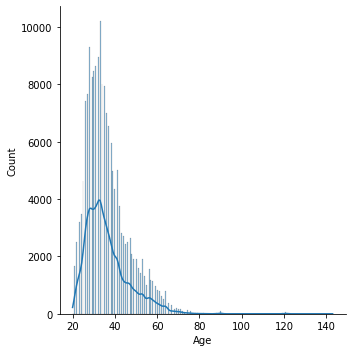

In [37]:
#Let's view the distribution of the Ages.
sb.displot(df['Age'], kde=True);

In [38]:
# Let's get the true 99% of the ages
df.Age.describe(percentiles = [.99])

# 99% of the persons using the service are under the age of 66

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
50%          34.000000
99%          66.000000
max         143.000000
Name: Age, dtype: float64

In [39]:
# It's safe to slowly do away with person's above the 66 years mark
df = df.query('Age <= 66')

In [40]:
# Let's separate the start_time and end_time into their individual components for visualization purposes
#  Start time month (January - December)
df['start_time_month'] = df['start_time'].dt.strftime('%B')

# Start time month (1-12)
df['start_time_month_num'] = df['start_time'].dt.month.astype(int)

# Start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%A')

# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

# Let's view our data so far.
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,37,February,2,Thursday,17,8,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,49,February,2,Thursday,12,5,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,32,February,2,Thursday,17,4,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,47,February,2,Thursday,23,0,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,62,February,2,Thursday,23,0,29


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173272 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173272 non-null  int64         
 1   start_time               173272 non-null  datetime64[ns]
 2   end_time                 173272 non-null  datetime64[ns]
 3   start_station_id         173272 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173272 non-null  float64       
 6   start_station_longitude  173272 non-null  float64       
 7   end_station_id           173272 non-null  object        
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173272 non-null  float64       
 10  end_station_longitude    173272 non-null  float64       
 11  bike_id                  173272 non-null  object        
 12  user_type       

### Structure of the dataset.

> From the previous cell, there are 174952 rows for Ford GoBike System in a bike-sharing system. There are 23 features that describe the data set.         

### The main feature(s) of interest in the dataset.

> There many features that be explored. However, from the preliminary investigations, the main features are centered around the start and end of a ride. Since this can be used to calculate when bikes are in high or low demand. There is also enough data on the demography of the users as well as their relationship with the service - casual or paying customer.


### Key features of Interest:

> The start and end times, and related time-based information and user type.

<a id='univariate'></a>
## Univariate Exploration

> In this section,  Let's look at the distributions of each of our key features. 

In [42]:
# Setting color 
color = sb.color_palette()[2]

### What is the relative distribution of patronage per week-day? 

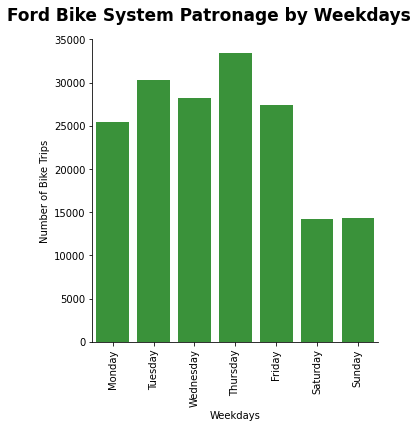

In [43]:
# Weekday usage of the Ford bike system
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot = sb.catplot(data=df, x='start_time_weekday', kind='count', color = color, order = weekday)

plot.set_axis_labels('Weekdays', 'Number of Bike Trips')

plot.fig.suptitle('Ford Bike System Patronage by Weekdays', y=1.05, fontsize=17, fontweight='bold');

plot.set_xticklabels(rotation=90);

>Observation(1): Tuesdays and Thursdays are the most popular days for using the bike sharing system, however Mondays, Wednesdays and Fridays also see relatively high patronages, saturdays and sundays are not popular as the rest of days.

### What is the distripution of patronage by hour ? 

In [44]:
#Function to label the visualization
def label_title( xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

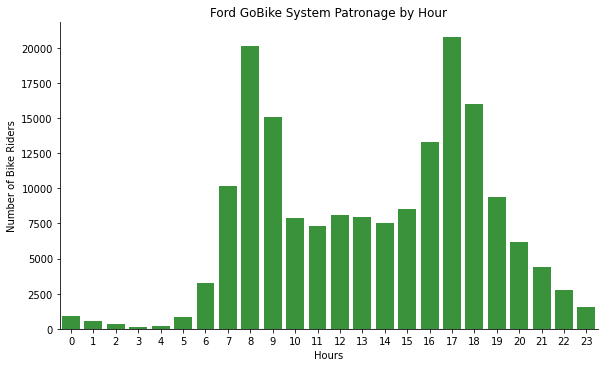

In [45]:
# Hourly usage of the Ford Go Bike System
plot = sb.catplot(data = df, x='start_time_hour', kind='count', color = color, aspect = 1.7)
label_title("Hours", "Number of Bike Riders", "Ford GoBike System Patronage by Hour")


> Observation(2): The most patronage is often during the hours of 8 and 9 in the morning, and in the afternoon at the hours of 5-6pm.

### What is the distribution of Ages of the customers? 

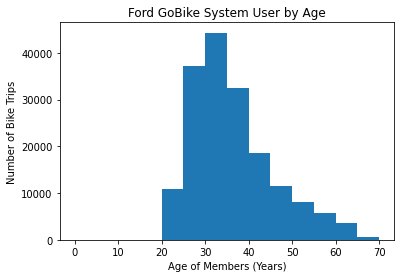

In [46]:
# Age group data
bin_edges = np.arange(0, 75, 5)
plt.hist(data = df, x = 'Age', bins = bin_edges);
label_title("Age of Members (Years)", "Number of Bike Trips", "Ford GoBike System User by Age")

Observation(3): The mean age of a user is 35.5 years old.

### What is the distribution of customers by Gender ? 

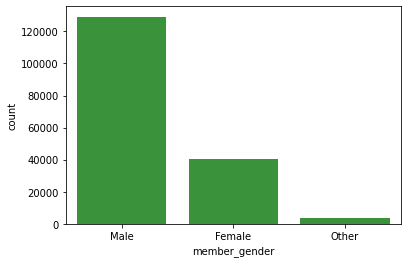

In [47]:
# Gender data 
o = df.member_gender.value_counts().index
sb.countplot(data=df , x='member_gender' , color=color , order=o);

>Observation(4): Most of the users of this system are male.

### What is the ditribution of user type (casual / paying) ? 

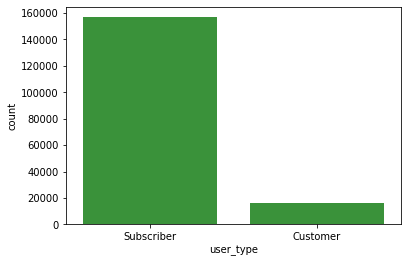

In [48]:
# Types of users 
o = df.user_type.value_counts().index
sb.countplot(data=df , x='user_type' , color=color , order=o);

> Observation(5): Most of the users of this system are Subscribers by user type.

### Which is the most popular Start stations ? 

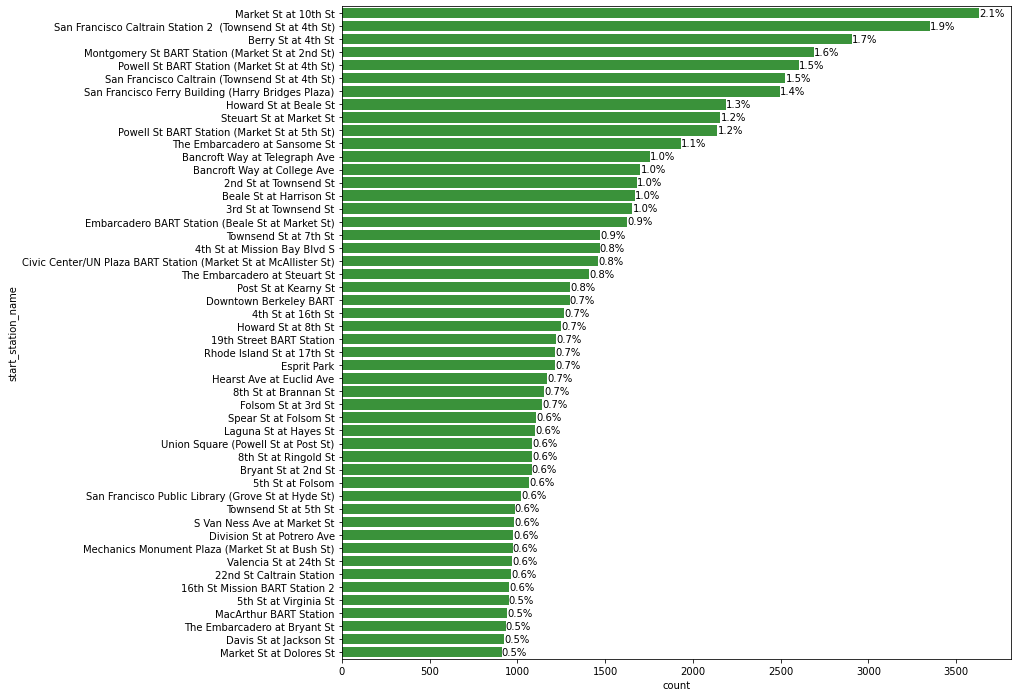

In [49]:
# Most popular Start station 
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
c = sb.color_palette()[2]
o = df.start_station_name.value_counts().head(50).index
sb.countplot(data=df , y='start_station_name' , color=c , order=o);

# Adding percentage  
start_counts = df.start_station_name.value_counts().head(50)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

> Observation(6): The most popular station is Market St at 10th St, followed by San francisco caltrian station 2, with Market St at Dolores St. being the least.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, The relationships between pairs of variables will be investigated. 

### What is the relation between week-day and number of trips depending on user type  ? 

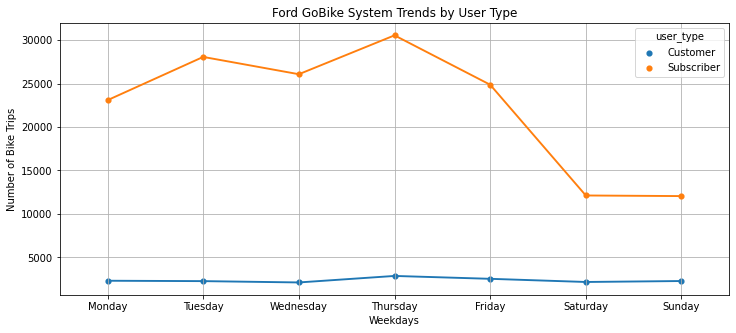

In [50]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

label_title("Weekdays", "Number of Bike Trips","Ford GoBike System Trends by User Type" )
plt.grid()

>Observation(1): Customers have a relatively low usage of the bike share system. Subscribers are the opposite.

### What is the relation between Ages and Time of trip ? 

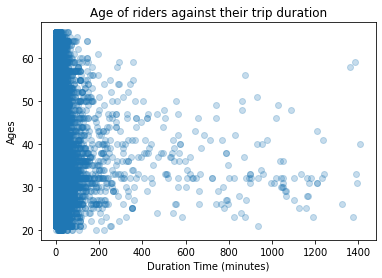

In [51]:
# plotting relation between ages and time tripping 
plt.scatter(data=df, x='duration_min' ,y='Age', alpha=5/20);
label_title("Duration Time (minutes)", "Ages", "Age of riders against their trip duration")

> Observation(2): It was observed that all ages love to trip less than 200 minutes.

### How does age affect the customers user type ? 

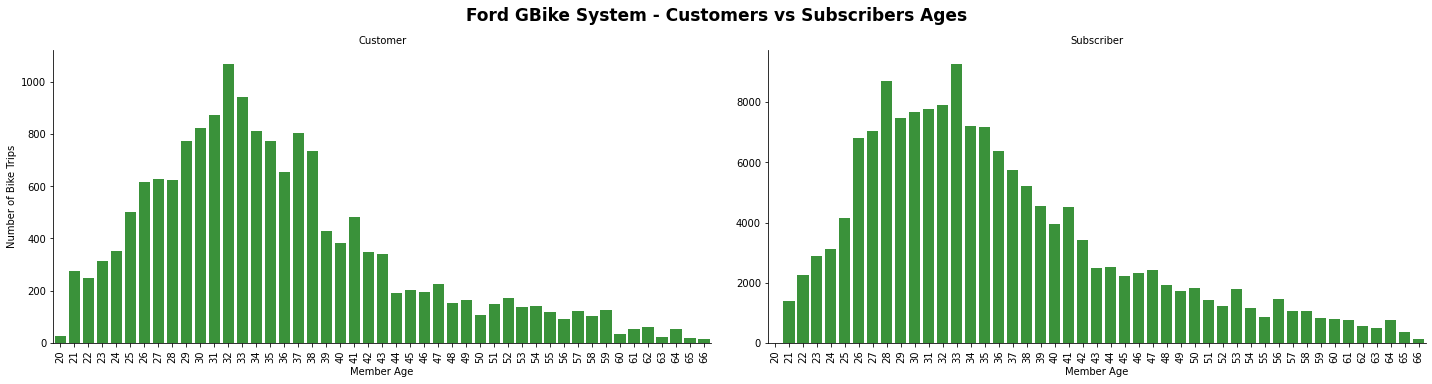

In [52]:
# Customer vs Subscriber Usage by Age
plot = sb.catplot(data = df, x = 'Age', col='user_type', kind='count', sharey = False, color = color, height=5, aspect=2)
plot.set_axis_labels('Member Age', 'Number of Bike Trips')
plot.set_titles('{col_name}')
plot.fig.suptitle('Ford GBike System - Customers vs Subscribers Ages', y=1.05, fontsize=17, fontweight='bold');
plot.set_xticklabels(rotation=90);

>Observation(3): Subscribers have a wider range of ages whilst Customers tends to have mostly younger users.

### What is the relation between Age and Gender ? 

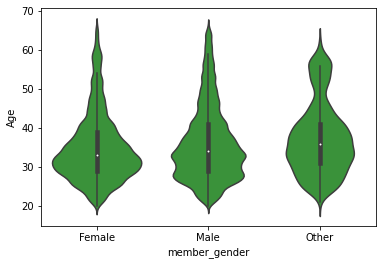

In [53]:
# plotting violin 
sb.violinplot(data=df, x='member_gender', y='Age', color=color, innner=None);

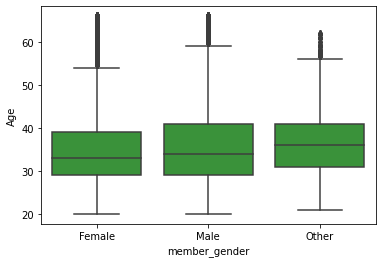

In [54]:
# plotting box plot 
sb.boxplot(data=df, x='member_gender', y='Age', color=color);

>Observation(4): Though not a huge difference, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter Inter Quartile Range.  


### What is the distribution of start hour depending on user type? 

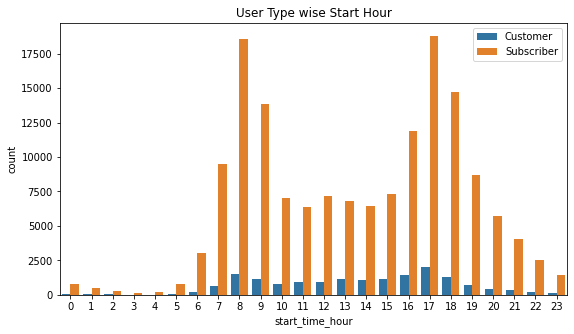

In [55]:
# clustered bar chart, absolute counts
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Hour');


> Observation(5): Subscribers take trips mostly during 8-9 am and 4-6 pm which is usually working hours of a company.

### What is the relation user type and time of trip? 

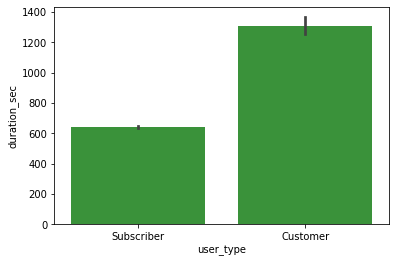

In [56]:
# making the order of user type 
o = df.user_type.value_counts().index
sb.barplot(y='duration_sec' , x='user_type' ,data=df , color=color , order=o);

> Observation(6): The customer type of users spend more time on trips compared to the subscriber type.

### Observations 

> There are a lot more subscribers patronizing the system than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends.

### Further observations

> It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year.

<a id='multivariate'></a>
## Multivariate Exploration

> Plots of three or more variables to investigate the Ford Go Bike data even further.

### What is the average trip duration variation in weekdays between customers and subscribers ?

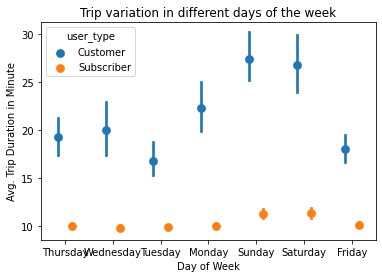

In [57]:
sb.pointplot(data=df, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
label_title('Day of Week', 'Avg. Trip Duration in Minute', 'Trip variation in different days of the week')

>Observation(1): It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week.

### What is the relation between trips taken by customers and subscribers on weekdays and weekends ? 

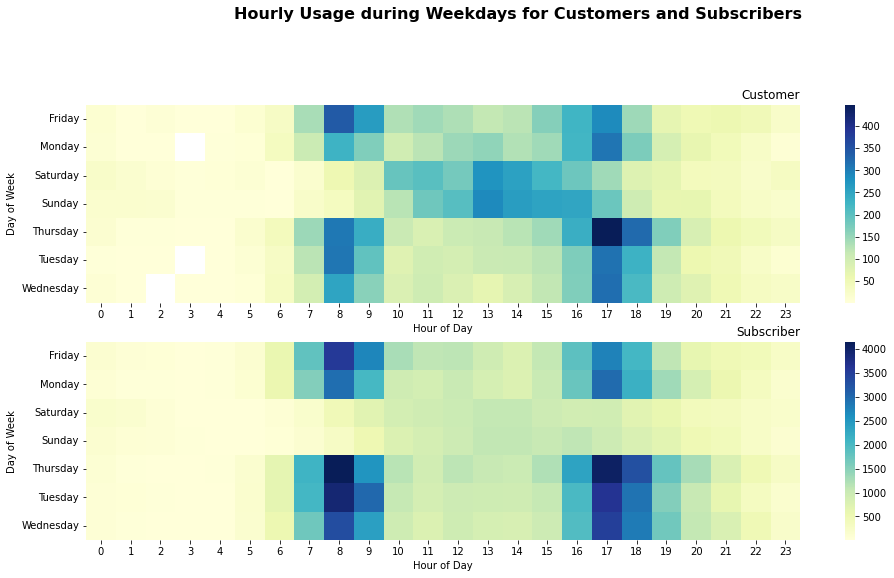

In [58]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');

plt.subplot(2, 1, 2);
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

>Observation(2): We can see clearly the trips taken by customers and subscribers on weekdays and weekends.

## Conclusions
### There were some features that strengthened each other in terms of looking at your feature(s) of interest.

The relationship between the various variables plotted is seen collectively and information is displayed simultaneously, strengthening some of the patterns identified in the preceding bivariate investigation as well as in the univariate research. Subscribers' efficient/short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. Customers are using the bike sharing system significantly differently from subscribers, as seen by their more flexible and loose use patterns.       

### There were interesting interactions between features.
The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records.

<a id='summary'></a>
## Summary

Renting a bike from the Ford Go-Bike System in San Francisco is a great way to explore the Bay Area. Subscribers and Customers use the system on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time.